# Pré-processamento dos dados de instrumentação de módulos de programas utilizados em espaçonaves da NASA

Arquivo JM1 de "_PROMISE Software Engineering Repository_"

## Importar bibliotecas Python que serão utilizadas

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.combine import SMOTETomek
smk = SMOTETomek()

## Ler o arquivo JM1 e apresentar amostra do conteúdo

In [2]:
df = pd.read_csv('../_data/jm1.csv', sep=',', index_col=None)

display(df.head(n=10))
df.shape

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,errorRate,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,0,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,1,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17.0,36.0,112.0,86.0,13.0,1,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17.0,135.0,329.0,271.0,5.0,1,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11.0,16.0,76.0,50.0,7.0,1,1
5,31.0,2.0,1.0,2.0,111.0,582.52,0.08,12.25,47.55,7135.87,...,0,5,0,14.0,24.0,69.0,42.0,3.0,1,1
6,78.0,9.0,5.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.0,0.0,0.0,0.0,17.0,1,1
7,8.0,1.0,1.0,1.0,16.0,50.72,0.36,2.80,18.11,142.01,...,0,1,0,4.0,5.0,9.0,7.0,1.0,1,1
8,24.0,2.0,1.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1,1
9,143.0,22.0,20.0,10.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0.0,0.0,0.0,0.0,43.0,1,1


(10885, 23)

## Remover todas as colunos exceto os indicadores de McCabe:

In [3]:
df.drop(df.columns.difference(['v(g)', 'ev(g)', 'iv(g)', 'loc', 'defects']), 1, inplace=True)

display(df.head(n=10))
df.shape

,loc,v(g),ev(g),iv(g),defects
0,1.1,1.4,1.4,1.4,0
1,1.0,1.0,1.0,1.0,1
2,72.0,7.0,1.0,6.0,1
3,190.0,3.0,1.0,3.0,1
4,37.0,4.0,1.0,4.0,1
5,31.0,2.0,1.0,2.0,1
6,78.0,9.0,5.0,4.0,1
7,8.0,1.0,1.0,1.0,1
8,24.0,2.0,1.0,2.0,1
9,143.0,22.0,20.0,10.0,1


(10885, 5)

## Tratar linhas com valores inválidos

In [4]:
df.drop(df.index[0], inplace = True)

idxRowNan = pd.isnull(df).any(1).to_numpy().nonzero()

display(df.iloc[idxRowNan])

df.drop(df.index[idxRowNan], inplace = True)

df.shape

,loc,v(g),ev(g),iv(g),defects


(10884, 5)

## Remover dados inválidos

In [5]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')

display(df[cols].head(n=10))
display(df.describe())
df[cols].shape

,loc,v(g),ev(g),iv(g),defects
1,1.0,1.0,1.0,1.0,1
2,72.0,7.0,1.0,6.0,1
3,190.0,3.0,1.0,3.0,1
4,37.0,4.0,1.0,4.0,1
5,31.0,2.0,1.0,2.0,1
6,78.0,9.0,5.0,4.0,1
7,8.0,1.0,1.0,1.0,1
8,24.0,2.0,1.0,2.0,1
9,143.0,22.0,20.0,10.0,1
10,73.0,10.0,4.0,6.0,1


,loc,v(g),ev(g),iv(g),defects
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000
mean,42.019938,6.349044,3.401231,4.001838,0.193495
std,76.595847,13.020206,6.772153,9.117274,0.395056
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,1.000000


(10884, 5)

## Normalização dos dados

In [6]:
def normalizar(data):
    """
    Normaliza os atributos em ''data''
    
    Esta função retorna uma versao normalizada de ''data'' onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = data.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Incializa as variaves de saída
    data_norm = np.random.rand(m,n) #inicializa data_norm com valores aleatórios
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
     
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0, ddof=1)
    
    for i in range(m):
        data_norm[i,:] = (data[i,:]-mu) / sigma
        
    
    return data_norm, mu, sigma

df_temp = df.iloc[:,0:-1].values

df_normal, mu, sigma = normalizar(df_temp)

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(df_temp[0,0],df_temp[0,1]))
print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(df_normal[0,0],df_normal[0,1]))



Primeira amostra da base antes da normalização: [1.0000 1.0000].

Primeira amostra da base apos normalização: [-0.5355 -0.4108].


### Mover os dados normalizados para a tabela original

In [7]:
df.iloc[:,0:-1] = df_normal

display(df.describe().round(8))
df.shape

,loc,v(g),ev(g),iv(g),defects
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000
mean,-0.000000,-0.000000,-0.000000,-0.000000,0.193495
std,1.000000,1.000000,1.000000,1.000000,0.395056
min,-0.535537,-0.410826,-0.354574,-0.329247,0.000000
25%,-0.404982,-0.334023,-0.354574,-0.329247,0.000000
50%,-0.248316,-0.257219,-0.354574,-0.219565,0.000000
75%,0.051962,0.049996,-0.059247,-0.000202,0.000000
max,44.388570,35.610108,23.862243,43.653197,1.000000


(10884, 5)

## Discretizar 'defects':

In [9]:
df['defects_binned'] = pd.cut(x = df['defects'], bins=[-1, 0, .2, .4, 1], labels=[0, 1, 2, 3])

### Remover as colunas que já foram discretizadas

In [10]:
df = df.drop(['defects'], axis = 1)

display(df.head(n=10))
df.shape

,loc,v(g),ev(g),iv(g),defects_binned
1,-0.535537,-0.410826,-0.354574,-0.329247,3
2,0.391406,0.049996,-0.354574,0.219162,3
3,1.931959,-0.257219,-0.354574,-0.109883,3
4,-0.065538,-0.180415,-0.354574,-0.000202,3
5,-0.143871,-0.334023,-0.354574,-0.219565,3
6,0.469739,0.203603,0.236080,-0.000202,3
7,-0.444149,-0.410826,-0.354574,-0.329247,3
8,-0.235260,-0.334023,-0.354574,-0.219565,3
9,1.318349,1.202051,2.451033,0.657890,3
10,0.404461,0.280407,0.088416,0.219162,3


(10884, 5)

## Análise de distribuição, covariancia e correlação:

### Gráfico de distribuição:

#### Defeitos

0    8778
3    2106
2       0
1       0
Name: defects_binned, dtype: int64

<AxesSubplot:xlabel='defects_binned', ylabel='count'>

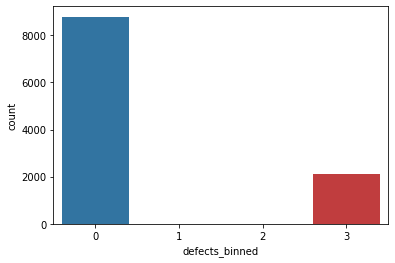

In [11]:
display(df['defects_binned'].value_counts())
sns.countplot(x = 'defects_binned', data=df)

### Matriz de covariância:

,loc,v(g),ev(g),iv(g)
loc,1.000000,0.817754,0.517545,0.784057
v(g),0.817754,1.000000,0.701707,0.859589
ev(g),0.517545,0.701707,1.000000,0.639571
iv(g),0.784057,0.859589,0.639571,1.000000


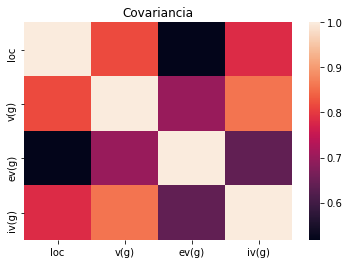

In [12]:
df_cov = df.cov()
display(df_cov)

sns.heatmap(df_cov, xticklabels = df_cov.columns, yticklabels = df_cov.columns)

plt.title('Covariancia')
plt.show()

### Matriz de correlação:

,loc,v(g),ev(g),iv(g)
loc,1.000000,0.817754,0.517545,0.784057
v(g),0.817754,1.000000,0.701707,0.859589
ev(g),0.517545,0.701707,1.000000,0.639571
iv(g),0.784057,0.859589,0.639571,1.000000


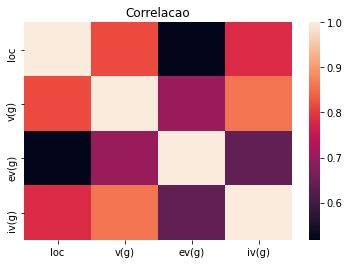

In [13]:
df_corr = df.corr()
display(df_corr)

sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns)

plt.title('Correlacao')
plt.show()

## Balanceamento dos Dados por _Oversampling_

In [15]:
df_independ = df.drop(['defects_binned'], 1)

df_depend_defects = df.drop(df.columns.difference(['defects_binned']), 1)
df_depend_defects_res, df_independ_defects_res = smk.fit_sample(df_independ, df_depend_defects)

### Distribuição após o balanceamento

In [22]:
display(df_depend_defects_res.head(n = 10))
df_depend_defects_res.shape

,loc,v(g),ev(g),iv(g)
0,-0.535537,-0.410826,-0.354574,-0.329247
1,0.391406,0.049996,-0.354574,0.219162
2,1.931959,-0.257219,-0.354574,-0.109883
3,-0.065538,-0.180415,-0.354574,-0.000202
4,-0.143871,-0.334023,-0.354574,-0.219565
5,0.469739,0.203603,0.236080,-0.000202
6,-0.444149,-0.410826,-0.354574,-0.329247
7,-0.235260,-0.334023,-0.354574,-0.219565
8,1.318349,1.202051,2.451033,0.657890
9,0.404461,0.280407,0.088416,0.219162


(17164, 4)

In [23]:
display(df_independ_defects_res.head(n = 10))
df_independ_defects_res.shape

,defects_binned
0,3
1,3
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3


(17164, 1)

In [25]:
df_res = pd.concat([df_depend_defects_res, df_independ_defects_res], axis = 1)
display(df_res.head(n = 10))
df_res.shape

,loc,v(g),ev(g),iv(g),defects_binned
0,-0.535537,-0.410826,-0.354574,-0.329247,3
1,0.391406,0.049996,-0.354574,0.219162,3
2,1.931959,-0.257219,-0.354574,-0.109883,3
3,-0.065538,-0.180415,-0.354574,-0.000202,3
4,-0.143871,-0.334023,-0.354574,-0.219565,3
5,0.469739,0.203603,0.236080,-0.000202,3
6,-0.444149,-0.410826,-0.354574,-0.329247,3
7,-0.235260,-0.334023,-0.354574,-0.219565,3
8,1.318349,1.202051,2.451033,0.657890,3
9,0.404461,0.280407,0.088416,0.219162,3


(17164, 5)

#### Defeitos

3    8582
0    8582
2       0
1       0
Name: defects_binned, dtype: int64

<AxesSubplot:xlabel='defects_binned', ylabel='count'>

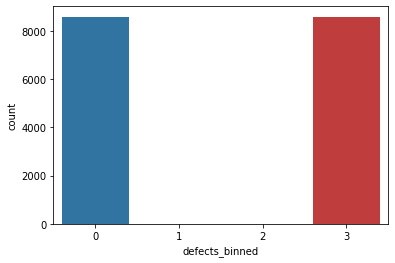

In [27]:
display(df_res['defects_binned'].value_counts())
sns.countplot(x = 'defects_binned', data = df_res)

## Salva os dados pré-processados

In [29]:
df.to_csv('../_pre/jm1_mccabe_pre.csv', index = False)

> This is the end